<a href="https://colab.research.google.com/github/kxshrx/collab_notbks/blob/main/heart_failure_logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:  "Heart Failure Prediction Dataset"


> Develop a machine learning model to predict the likelihood of heart failure based on various medical attributes collected from patients. The dataset contains information such as age, sex, chest pain type, resting blood pressure, serum cholesterol levels, fasting blood sugar, electrocardiogram results, maximum heart rate achieved, presence of exercise-induced angina, oldpeak value, and the slope of the peak exercise ST segment.


> The objective is to build a classification model that can accurately classify patients into two classes: those with heart disease (class 1) and those without heart disease (class 0). This model will aid healthcare professionals in early detection and intervention, potentially improving patient outcomes and reducing the incidence of heart-related complications.








######https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
heart_og_df = pd.read_csv('heart.csv')
heart_og_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [82]:
heart_og_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


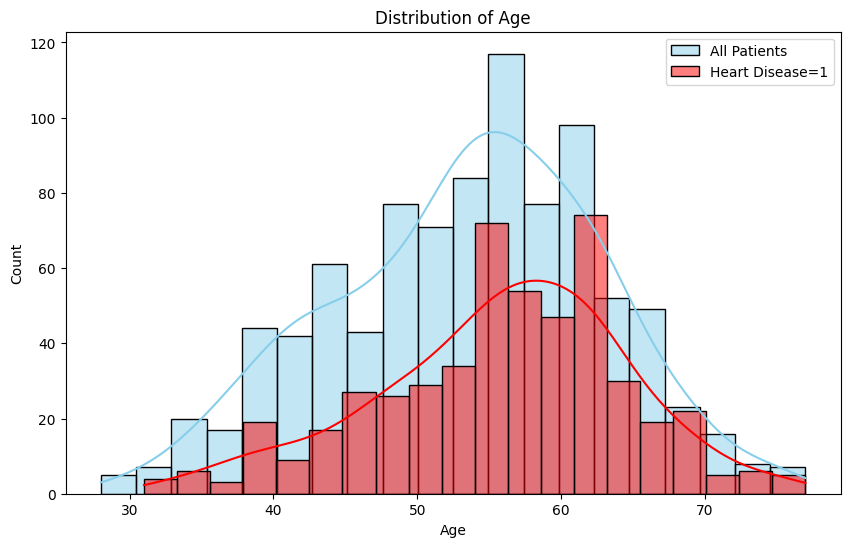

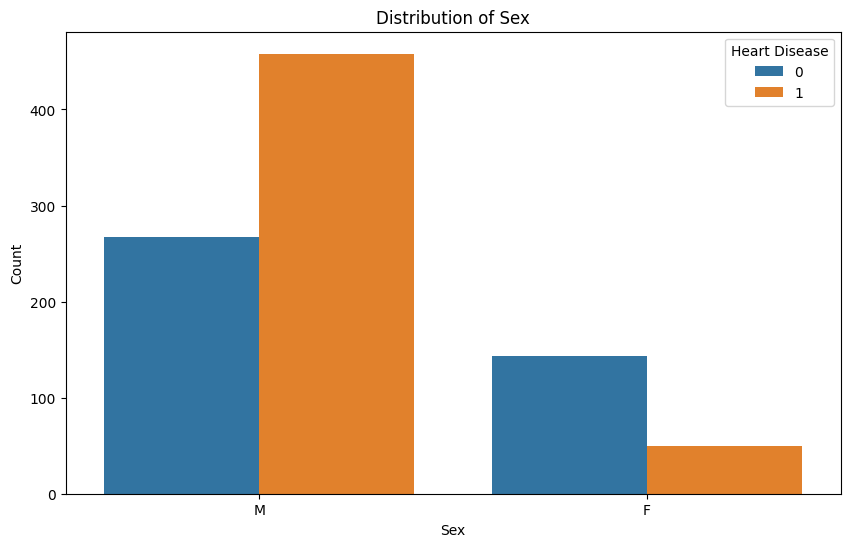

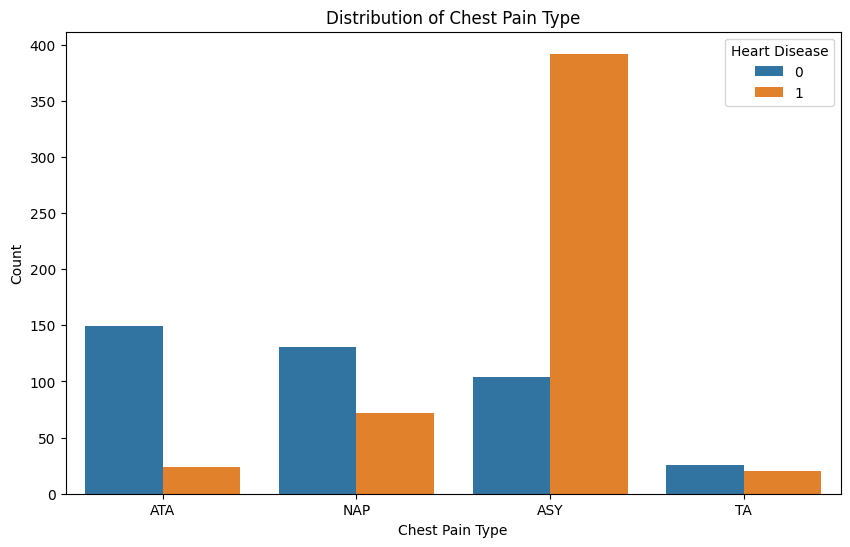

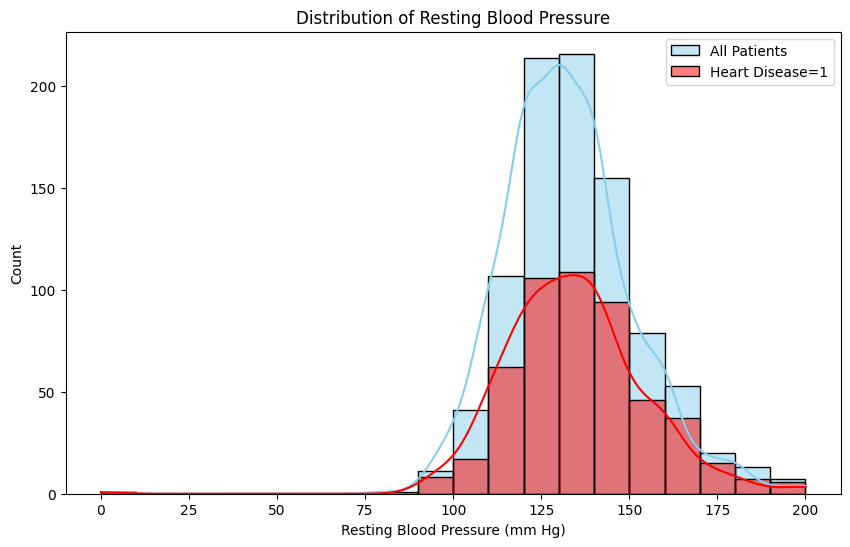

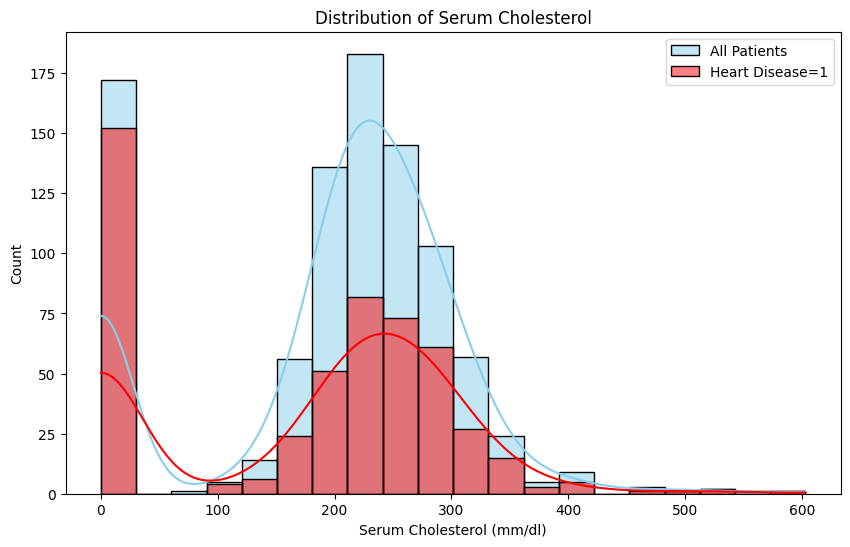

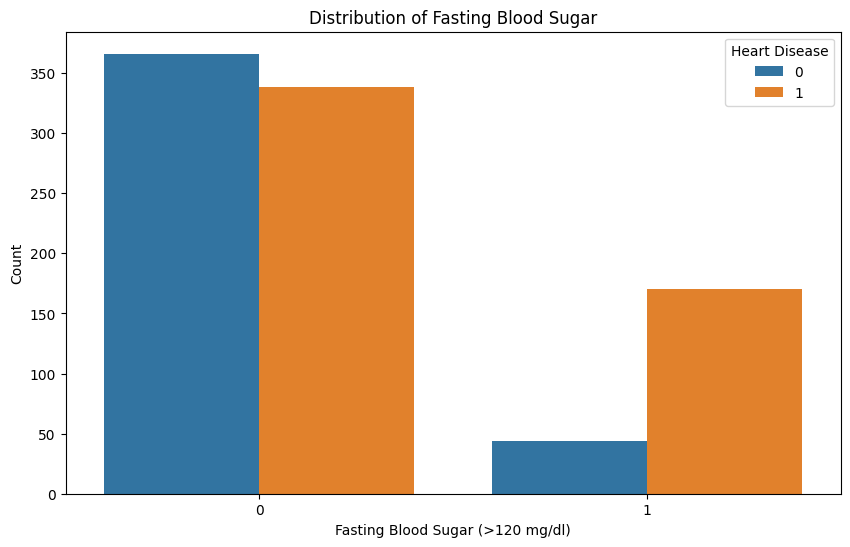

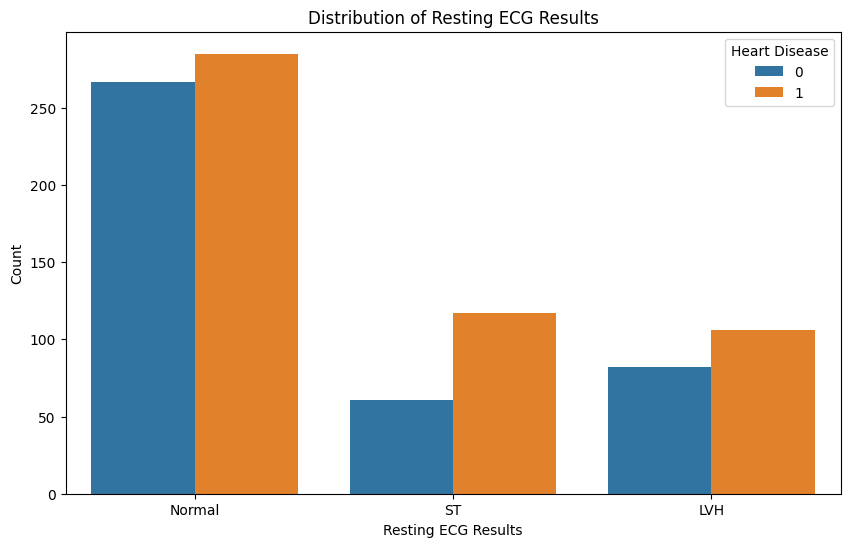

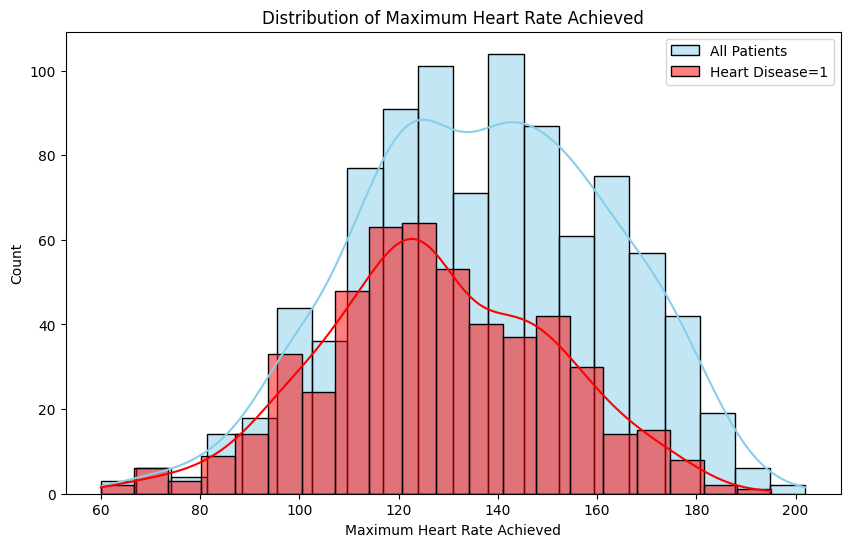

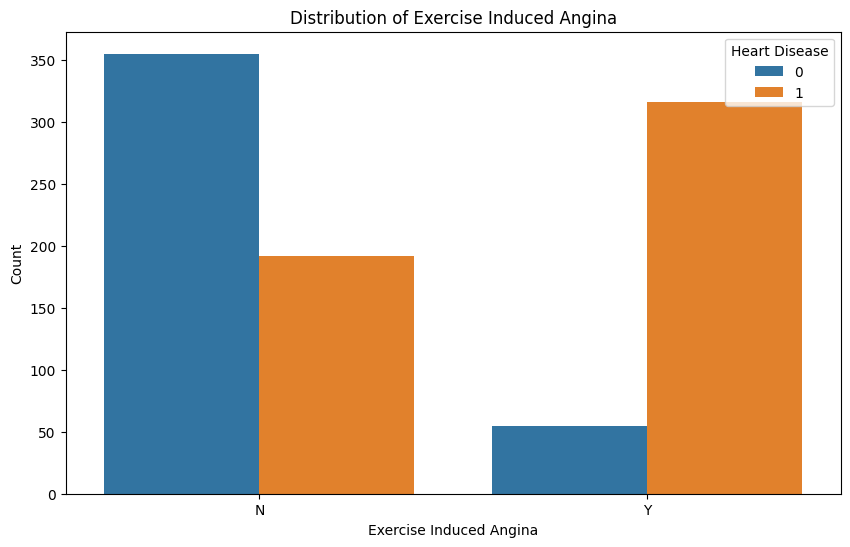

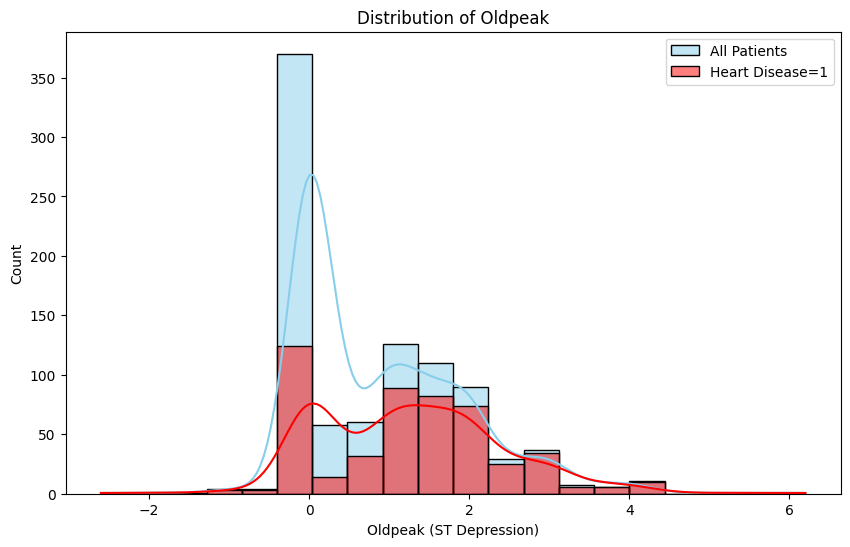

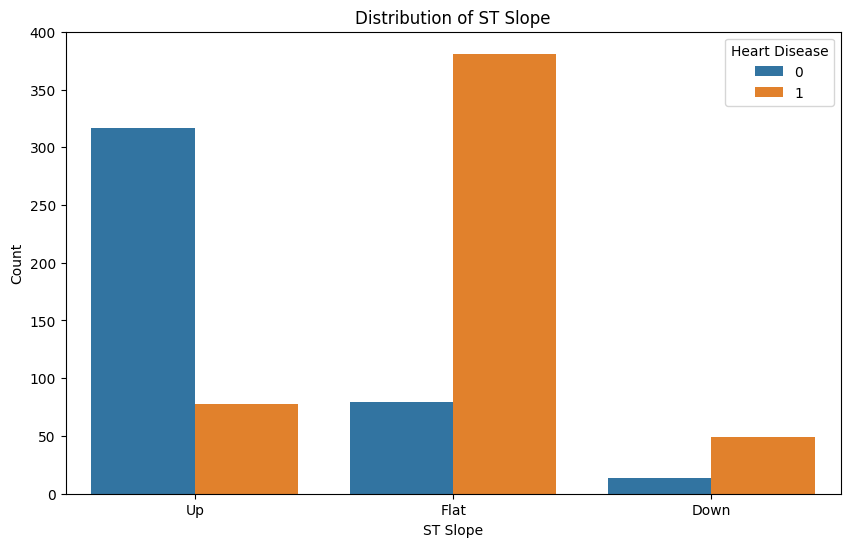

In [83]:
import seaborn as sns

# Define uniform figure size
figsize = (10, 6)

# Filter dataset for rows where HeartDisease is 1
heart_disease_positive = heart_og_df[heart_og_df['HeartDisease'] == 1]

# 1. Age
plt.figure(figsize=figsize)
sns.histplot(heart_og_df['Age'], bins=20, kde=True, color='skyblue', label='All Patients')
sns.histplot(heart_disease_positive['Age'], bins=20, kde=True, color='red', label='Heart Disease=1')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

# 2. Sex
plt.figure(figsize=figsize)
sns.countplot(x='Sex', data=heart_og_df, hue='HeartDisease')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['0', '1'])
plt.show()

# 3. ChestPainType
plt.figure(figsize=figsize)
sns.countplot(x='ChestPainType', data=heart_og_df, hue='HeartDisease')
plt.title('Distribution of Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['0', '1'])
plt.show()

# 4. RestingBP
plt.figure(figsize=figsize)
sns.histplot(heart_og_df['RestingBP'], bins=20, kde=True, color='skyblue', label='All Patients')
sns.histplot(heart_disease_positive['RestingBP'], bins=20, kde=True, color='red', label='Heart Disease=1')
plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Count')
plt.legend()
plt.show()

# 5. Cholesterol
plt.figure(figsize=figsize)
sns.histplot(heart_og_df['Cholesterol'], bins=20, kde=True, color='skyblue', label='All Patients')
sns.histplot(heart_disease_positive['Cholesterol'], bins=20, kde=True, color='red', label='Heart Disease=1')
plt.title('Distribution of Serum Cholesterol')
plt.xlabel('Serum Cholesterol (mm/dl)')
plt.ylabel('Count')
plt.legend()
plt.show()

# 6. FastingBS
plt.figure(figsize=figsize)
sns.countplot(x='FastingBS', data=heart_og_df, hue='HeartDisease')
plt.title('Distribution of Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar (>120 mg/dl)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['0', '1'])
plt.show()

# 7. RestingECG
plt.figure(figsize=figsize)
sns.countplot(x='RestingECG', data=heart_og_df, hue='HeartDisease')
plt.title('Distribution of Resting ECG Results')
plt.xlabel('Resting ECG Results')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['0', '1'])
plt.show()

# 8. MaxHR
plt.figure(figsize=figsize)
sns.histplot(heart_og_df['MaxHR'], bins=20, kde=True, color='skyblue', label='All Patients')
sns.histplot(heart_disease_positive['MaxHR'], bins=20, kde=True, color='red', label='Heart Disease=1')
plt.title('Distribution of Maximum Heart Rate Achieved')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Count')
plt.legend()
plt.show()

# 9. ExerciseAngina
plt.figure(figsize=figsize)
sns.countplot(x='ExerciseAngina', data=heart_og_df, hue='HeartDisease')
plt.title('Distribution of Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['0', '1'])
plt.show()

# 10. Oldpeak
plt.figure(figsize=figsize)
sns.histplot(heart_og_df['Oldpeak'], bins=20, kde=True, color='skyblue', label='All Patients')
sns.histplot(heart_disease_positive['Oldpeak'], bins=20, kde=True, color='red', label='Heart Disease=1')
plt.title('Distribution of Oldpeak')
plt.xlabel('Oldpeak (ST Depression)')
plt.ylabel('Count')
plt.legend()
plt.show()

# 11. ST_Slope
plt.figure(figsize=figsize)
sns.countplot(x='ST_Slope', data=heart_og_df, hue='HeartDisease')
plt.title('Distribution of ST Slope')
plt.xlabel('ST Slope')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['0', '1'])
plt.show()


In [84]:
heart_og_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

NOTES:




1.    sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope => categorical data => has to be encoded
2.   feature scaling: age,
3.   RestingBP	Cholesterol	 cant be 0 have to handle values
4.   label encoder => ExerciseAngina, Sex
5.   onehot encoder =>ChestPainType, RestingECG, ST_Slope








In [85]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'Sex' column and add to original dataframe
heart_og_df['Sex_enc'] = le.fit_transform(heart_og_df['Sex'])
heart_og_df.drop(columns=['Sex'], inplace=True)

# Encode 'ExerciseAngina' column and add to original dataframe
heart_og_df['ExerciseAngina_enc'] = le.fit_transform(heart_og_df['ExerciseAngina'])
heart_og_df.drop(columns=['ExerciseAngina'], inplace=True)

# Display modified dataframe
heart_og_df


,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_enc,ExerciseAngina_enc
0,40,ATA,140,289,0,Normal,172,0.0,Up,0,1,0
1,49,NAP,160,180,0,Normal,156,1.0,Flat,1,0,0
2,37,ATA,130,283,0,ST,98,0.0,Up,0,1,0
3,48,ASY,138,214,0,Normal,108,1.5,Flat,1,0,1
4,54,NAP,150,195,0,Normal,122,0.0,Up,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,1.2,Flat,1,1,0
914,68,ASY,144,193,1,Normal,141,3.4,Flat,1,1,0
915,57,ASY,130,131,0,Normal,115,1.2,Flat,1,1,1
916,57,ATA,130,236,0,LVH,174,0.0,Flat,1,0,0


In [86]:
columns_to_onehotencode = ['ChestPainType','RestingECG','ST_Slope']

In [87]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Transform and fit columns, create a new dataframe with encoded columns
encoded_cols = ohe.fit_transform(heart_og_df[columns_to_onehotencode])
encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out(columns_to_onehotencode))

# Concatenate encoded dataframe with original dataframe, drop required columns
heart_og_df.drop(columns=columns_to_onehotencode, inplace=True)
heart_og_df = pd.concat([heart_og_df, encoded_df], axis=1)


In [88]:
heart_og_df


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_enc,ExerciseAngina_enc,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,1,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
916,57,130,236,0,174,0.0,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [89]:
#moved target variable to the last for better visualisation

target = heart_og_df.pop('HeartDisease')
heart_og_df['HeartDisease'] = target
heart_og_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_enc,ExerciseAngina_enc,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,49,160,180,0,156,1.0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,37,130,283,0,98,0.0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,48,138,214,0,108,1.5,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,54,150,195,0,122,0.0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
914,68,144,193,1,141,3.4,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
915,57,130,131,0,115,1.2,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
916,57,130,236,0,174,0.0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


In [90]:
(heart_og_df['RestingBP']==0).sum()

1

In [91]:
heart_og_df.shape

(918, 19)

In [92]:
#dropped the record where restingbp was 0 since there was only one row
heart_og_df = heart_og_df[heart_og_df['RestingBP'] != 0]
heart_og_df.shape

(917, 19)

In [93]:
heart_og_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_enc,ExerciseAngina_enc,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.789531,0.404580,0.540894,0.188659,0.220284,0.050164,0.205016,0.600872,0.194111,0.068702,0.500545,0.430752,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.407864,0.491078,0.498597,0.391451,0.414664,0.218401,0.403934,0.489986,0.395731,0.253085,0.500273,0.495452,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
(heart_og_df['Cholesterol']==0).sum()

171

In [95]:
171/917

0.18647764449291168

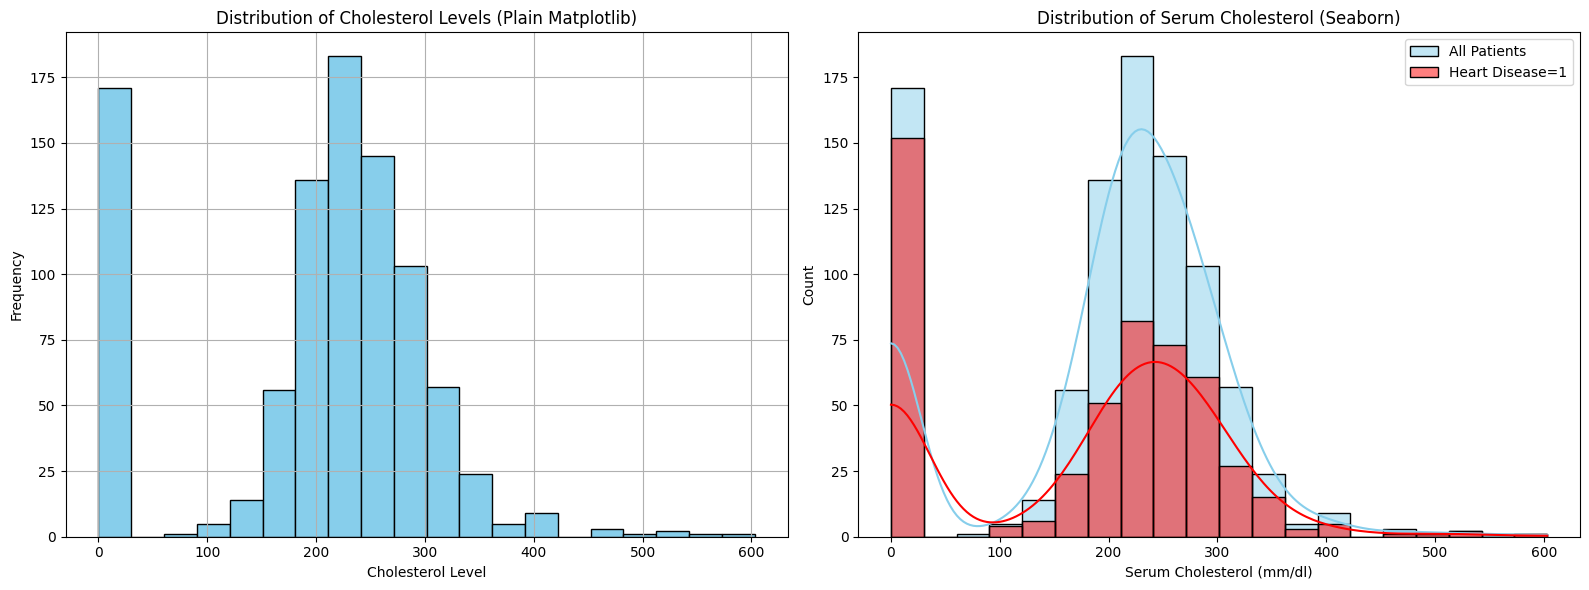

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot histogram of cholesterol levels (plain matplotlib)
axs[0].hist(heart_og_df['Cholesterol'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Cholesterol Levels (Plain Matplotlib)')
axs[0].set_xlabel('Cholesterol Level')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Plot histogram of cholesterol levels (Seaborn)
sns.histplot(heart_og_df['Cholesterol'], bins=20, kde=True, color='skyblue', label='All Patients', ax=axs[1])
sns.histplot(heart_disease_positive['Cholesterol'], bins=20, kde=True, color='red', label='Heart Disease=1', ax=axs[1])
axs[1].set_title('Distribution of Serum Cholesterol (Seaborn)')
axs[1].set_xlabel('Serum Cholesterol (mm/dl)')
axs[1].set_ylabel('Count')
axs[1].legend()

plt.tight_layout()
plt.show()


In [97]:
median_cholesterol = heart_og_df.loc[heart_og_df['Cholesterol'] != 0, 'Cholesterol'].median()
heart_og_df.loc[heart_og_df['Cholesterol'] == 0, 'Cholesterol'] = median_cholesterol

In [98]:
heart_og_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_enc,ExerciseAngina_enc,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,49,160,180,0,156,1.0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,37,130,283,0,98,0.0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,48,138,214,0,108,1.5,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,54,150,195,0,122,0.0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
914,68,144,193,1,141,3.4,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
915,57,130,131,0,115,1.2,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
916,57,130,236,0,174,0.0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


In [99]:
heart_og_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_enc,ExerciseAngina_enc,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,243.211559,0.233370,136.789531,0.886696,0.789531,0.404580,0.540894,0.188659,0.220284,0.050164,0.205016,0.600872,0.194111,0.068702,0.500545,0.430752,0.552890
std,9.437636,17.999749,53.430044,0.423206,25.467129,1.066960,0.407864,0.491078,0.498597,0.391451,0.414664,0.218401,0.403934,0.489986,0.395731,0.253085,0.500273,0.495452,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


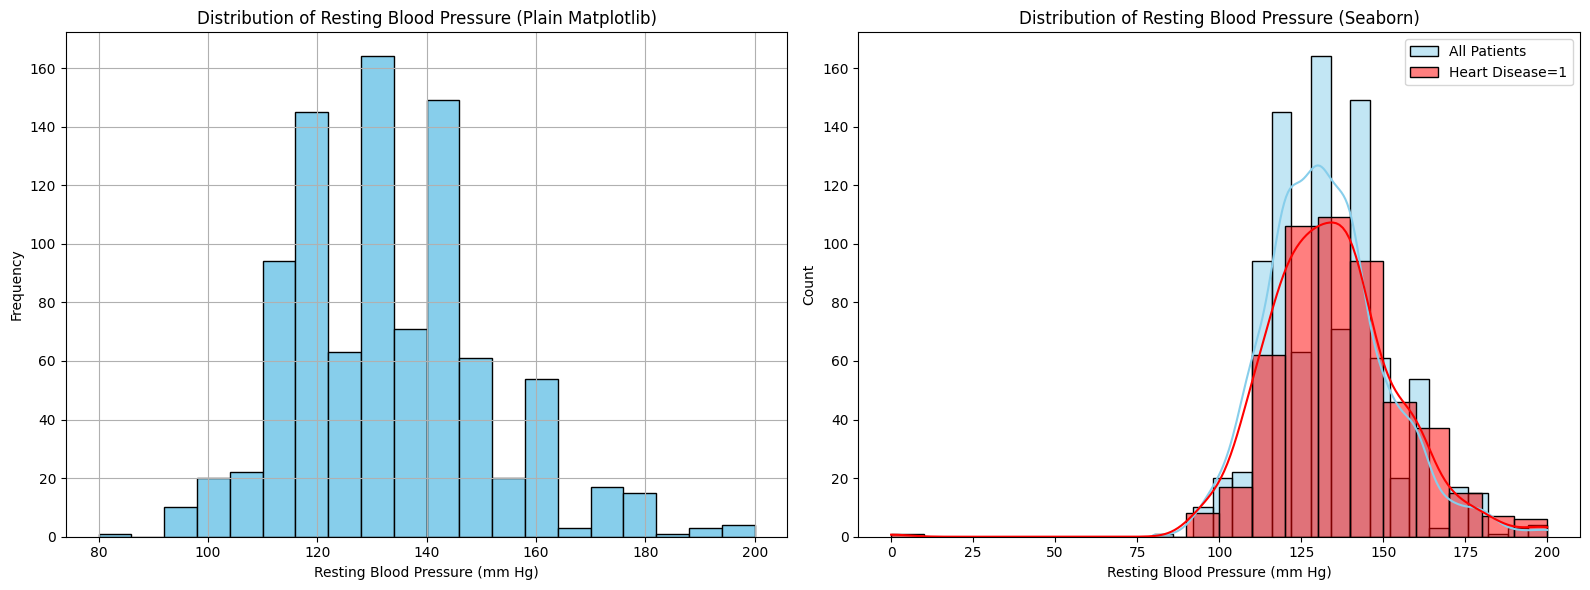

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot histogram of Resting Blood Pressure levels (plain matplotlib)
axs[0].hist(heart_og_df['RestingBP'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Resting Blood Pressure (Plain Matplotlib)')
axs[0].set_xlabel('Resting Blood Pressure (mm Hg)')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Plot histogram of Resting Blood Pressure levels (Seaborn)
sns.histplot(heart_og_df['RestingBP'], bins=20, kde=True, color='skyblue', label='All Patients', ax=axs[1])
sns.histplot(heart_disease_positive['RestingBP'], bins=20, kde=True, color='red', label='Heart Disease=1', ax=axs[1])
axs[1].set_title('Distribution of Resting Blood Pressure (Seaborn)')
axs[1].set_xlabel('Resting Blood Pressure (mm Hg)')
axs[1].set_ylabel('Count')
axs[1].legend()

plt.tight_layout()
plt.show()


In [101]:
#unchanged dataframe copy
heart_df_pfs = heart_og_df.copy()
heart_df_pfs

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_enc,ExerciseAngina_enc,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,49,160,180,0,156,1.0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,37,130,283,0,98,0.0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,48,138,214,0,108,1.5,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,54,150,195,0,122,0.0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
914,68,144,193,1,141,3.4,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
915,57,130,131,0,115,1.2,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
916,57,130,236,0,174,0.0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


# ***model building***

In [102]:
X = heart_og_df.iloc[:,:-1].values
Y = heart_og_df.iloc[:,-1].values

In [103]:
print(X)
print(Y)

[[ 40. 140. 289. ...   0.   0.   1.]
 [ 49. 160. 180. ...   0.   1.   0.]
 [ 37. 130. 283. ...   0.   0.   1.]
 ...
 [ 57. 130. 131. ...   0.   1.   0.]
 [ 57. 130. 236. ...   0.   1.   0.]
 [ 38. 138. 175. ...   0.   0.   1.]]
[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1

In [104]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25,random_state=1)
print(xtrain)
print(xtest)
print(ytrain)
print(ytest)

[[ 51. 131. 152. ...   0.   1.   0.]
 [ 43. 150. 247. ...   0.   0.   1.]
 [ 59. 140. 287. ...   0.   0.   1.]
 ...
 [ 63. 124. 197. ...   0.   1.   0.]
 [ 39. 120. 200. ...   0.   1.   0.]
 [ 41. 110. 250. ...   0.   0.   1.]]
[[ 62. 128. 208. ...   0.   0.   1.]
 [ 50. 133. 218. ...   0.   1.   0.]
 [ 34. 118. 182. ...   0.   0.   1.]
 ...
 [ 64. 142. 276. ...   0.   1.   0.]
 [ 68. 120. 211. ...   0.   1.   0.]
 [ 54. 130. 294. ...   0.   1.   0.]]
[1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1
 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1
 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0
 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0
 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1
 0 1 1 0 1 1 1 1 1 

In [105]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
ssc.fit(xtrain)
xtrain_scaled = ssc.transform(xtrain)
xtest_scaled = ssc.transform(xtest)

In [106]:
print(xtrain_scaled)
print(xtest_scaled)

[[-0.2721222  -0.09107932 -1.64144743 ... -0.28016591  1.02207772
  -0.88305874]
 [-1.12625332  0.9723002   0.05761155 ... -0.28016591 -0.97839918
   1.13242749]
 [ 0.58200892  0.41262677  0.7730048  ... -0.28016591 -0.97839918
   1.13242749]
 ...
 [ 1.00907449 -0.48285072 -0.83663002 ... -0.28016591  1.02207772
  -0.88305874]
 [-1.55331888 -0.70672009 -0.78297553 ... -0.28016591  1.02207772
  -0.88305874]
 [-1.3397861  -1.26639352  0.11126604 ... -0.28016591 -0.97839918
   1.13242749]]
[[ 0.90230809 -0.25898134 -0.63989688 ... -0.28016591 -0.97839918
   1.13242749]
 [-0.37888859  0.02085537 -0.46104856 ... -0.28016591  1.02207772
  -0.88305874]
 [-2.08715083 -0.81865477 -1.10490249 ... -0.28016591 -0.97839918
   1.13242749]
 ...
 [ 1.11584088  0.52456146  0.57627166 ... -0.28016591  1.02207772
  -0.88305874]
 [ 1.54290644 -0.70672009 -0.58624238 ... -0.28016591  1.02207772
  -0.88305874]
 [ 0.04817697 -0.14704666  0.89819862 ... -0.28016591  1.02207772
  -0.88305874]]


In [107]:
print(xtrain_scaled.shape)
print(xtest_scaled.shape)
print(ytrain.shape)
print(ytest.shape)

(687, 18)
(230, 18)
(687,)
(230,)


In [108]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(687, 18)
(230, 18)
(687,)
(230,)


In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain_scaled,ytrain)

LogisticRegression()

In [110]:
ypred = logreg.predict(xtest_scaled)

In [111]:
ypred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(ytest, ypred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(ytest, ypred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(ytest, ypred)
print("F1-score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(ytest, ypred)
print("Confusion matrix:")
print(conf_matrix)


Accuracy: 0.8565217391304348
Precision: 0.8968253968253969
Recall: 0.849624060150376
F1-score: 0.8725868725868726
Confusion matrix:
[[ 84  13]
 [ 20 113]]


In [113]:
logreg.score(xtest_scaled,ytest)

0.8565217391304348

In [114]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest,ypred)
cm

array([[ 84,  13],
       [ 20, 113]])

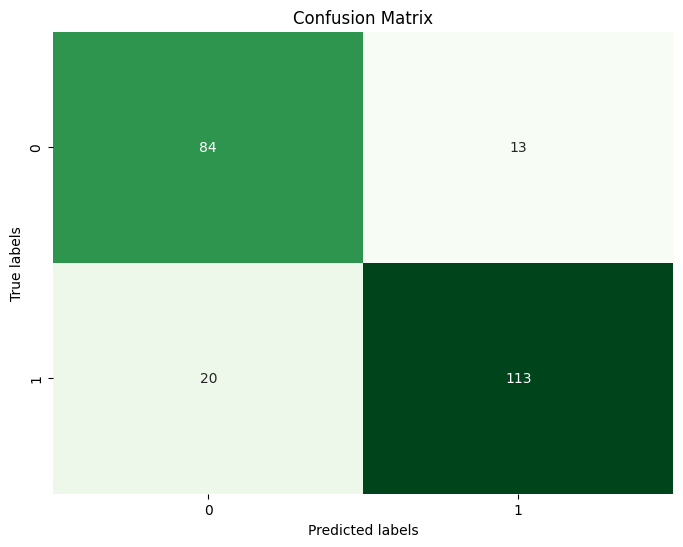

In [115]:
import seaborn as sns

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()